In [1]:
%run model-run-function-definitions.ipynb

## X wind

In [12]:
TEMP_VAR = "x_wind"

#Alt 
xwind_alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-{}/um_pverc_*.nc")  

# Con

# bundle info
xwind_con_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    '/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-{}/um_pverc_*.nc')  

In [13]:
for year in xwind_alt_year_xr_map.keys():
    next_year =  year + 1
    var_xr = xwind_alt_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    xwind_alt_year_xr_map[year] = var_xr_slice
    
for year in xwind_con_year_xr_map.keys():
    next_year =  year + 1
    var_xr = xwind_con_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    xwind_con_year_xr_map[year] = var_xr_slice

In [14]:
# Diff
xwind_diff_year_xr_map = get_diff_year_xr_map(xwind_alt_year_xr_map, xwind_con_year_xr_map)

Following years in alt_xr_map is not in con_xr_map: {1999, 2000, 2001, 2003, 2004, 2006}
Following years in con_xr_map is not in alt_xr_map: {1994, 1995, 1996}


In [ ]:
# Untested v

xwind_year_phases_xr = get_year_2phases_xr(xwind_diff_year_xr_map, xwind_diff_year_xr_map)

In [23]:
#xwind_sig_da = get_sig_da(xwind_year_phases_xr.sel(latitude=-36), dim1='pressure', dim2='longitude')
xwind_sig_da = get_sig_da(xwind_year_phases_xr.mean(dim='latitude'), dim1='pressure', dim2='longitude')

/local/e14/cp3790/tmp/ipykernel_3628365/3479682445.py:16: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  contour = ax[col].contourf(
/local/e14/cp3790/tmp/ipykernel_3628365/3479682445.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  ax[col].contourf(


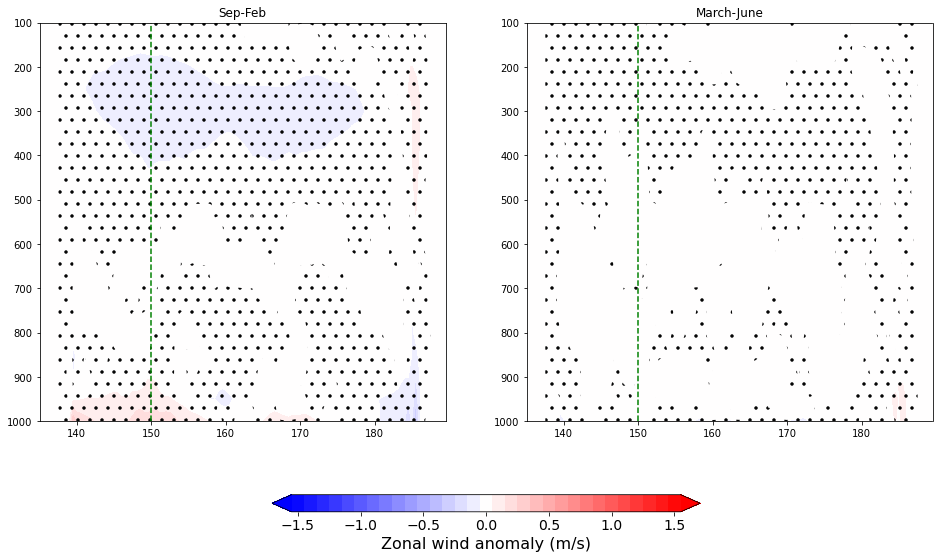

In [25]:
## monthly panels

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9))  
    
    #data = xwind_year_phases_xr.sel(latitude=-36).mean(dim='time')
    data = xwind_year_phases_xr.mean(dim='latitude').mean(dim='time')

    phases = ['Sep-Feb', 'March-June']

    for col in range(ncol):
        cur_data = data[col]
        contour = ax[col].contourf(
            cur_data.longitude,
            cur_data.pressure,
            cur_data.values,
            levels=np.arange(-1.55, 1.6, 0.1),
            add_colorbar=False,
            cmap=plt.cm.get_cmap('bwr'),
            extend='both', 
        )

        phase_mask_mean = xwind_sig_da[col]
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.pressure,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )
        ax[col].set_title(phases[col])
        ax[col].invert_yaxis()
        ax[col].axvline(x=150, linestyle='--', color='green')
        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-1.5, 1.6, 0.5),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Zonal wind anomaly (m/s)", fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_vertical_uwind_phases_mean_lat.png')
    

multiple_plots()

/local/e14/cp3790/tmp/ipykernel_2397126/1980735622.py:23: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  ax[col].contourf(


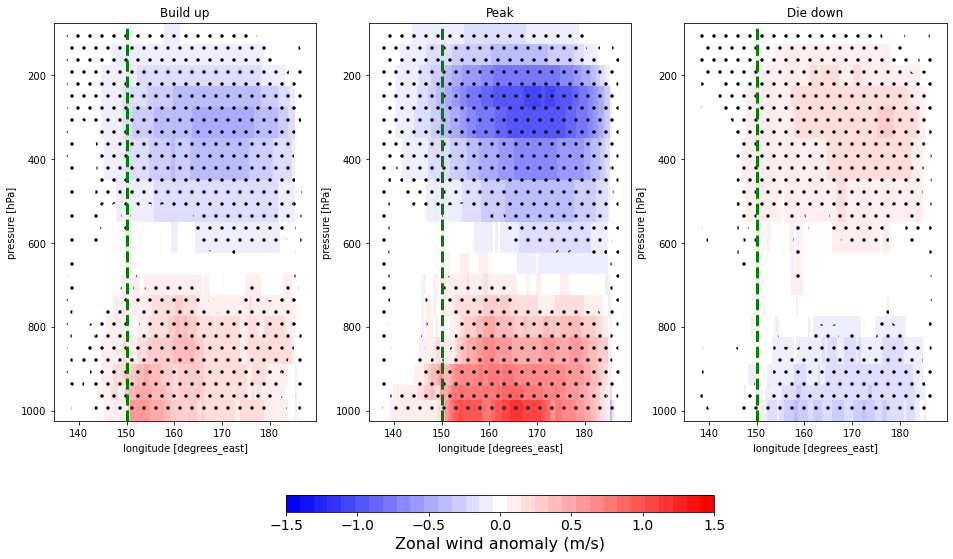

In [39]:
## monthly panels

def multiple_plots():
    nrow = 1
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9))  
    
    data = xwind_year_phases_xr.sel(latitude=-35).mean(dim='time')

    phases = ['Build up', 'Peak', 'Die down']

    for col in range(ncol):
        cur_data = data[col]
        contour = cur_data.plot(
            ax=ax[col],
            cmap=plt.cm.get_cmap('bwr', 31),
            vmin=-1.5, vmax=1.5,
            add_colorbar=False,
        )

        phase_mask_mean = xwind_sig_da[col]
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.pressure,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )
        ax[col].set_title(phases[col])
        ax[col].invert_yaxis()
        ax[col].axvline(x=150, linestyle='--', color='green', linewidth=3)
        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-1.5, 1.6, 0.5),
                        fraction=0.035,aspect=25)
    cbar.set_label("Zonal wind anomaly (m/s)", fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_vertical_uwind_phases.png')
    

multiple_plots()

## Y wind

In [8]:
TEMP_VAR = "y_wind"

#Alt 
ywind_alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-{}/um_pverc_*.nc")  

# Con

# bundle info
ywind_con_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    '/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-{}/um_pverc_*.nc')  

In [10]:
for year in ywind_alt_year_xr_map.keys():
    next_year =  year + 1
    var_xr = ywind_alt_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    ywind_alt_year_xr_map[year] = var_xr_slice
    
for year in ywind_con_year_xr_map.keys():
    next_year =  year + 1
    var_xr = ywind_con_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    ywind_con_year_xr_map[year] = var_xr_slice

In [11]:
# Diff
ywind_diff_year_xr_map = get_diff_year_xr_map(ywind_alt_year_xr_map, ywind_con_year_xr_map)

ywind_year_phases_xr = get_year_phases_xr(ywind_alt_year_xr_map, ywind_diff_year_xr_map)

ywind_sig_da = get_sig_da(ywind_year_phases_xr.sel(latitude=-35), dim1='pressure', dim2='longitude')

/local/e14/cp3790/tmp/ipykernel_1730392/2741366241.py:15: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  contour = ax[col].contourf(
/local/e14/cp3790/tmp/ipykernel_1730392/2741366241.py:25: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  ax[col].contourf(


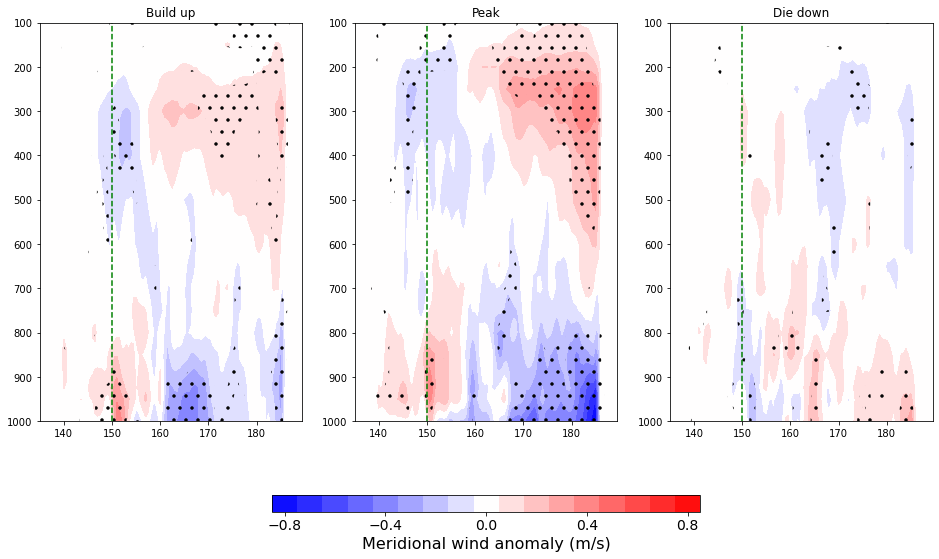

In [13]:
## monthly panels

def multiple_plots():
    nrow = 1
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9))  
    
    data = ywind_year_phases_xr.sel(latitude=-35).mean(dim='time')

    phases = ['Build up', 'Peak', 'Die down']

    for col in range(ncol):
        cur_data = data[col]
        contour = ax[col].contourf(
            cur_data.longitude,
            cur_data.pressure,
            cur_data.values,
            levels=np.arange(-0.85, 0.9, 0.1),
            add_colorbar=False,
            cmap=plt.cm.get_cmap('bwr'), 
        )

        phase_mask_mean = ywind_sig_da[col]
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.pressure,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )
        ax[col].set_title(phases[col])
        ax[col].invert_yaxis()
        ax[col].axvline(x=150, linestyle='--', color='green')
        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-0.8, 0.9, 0.4),
                        fraction=0.035,aspect=25)
    cbar.set_label("Meridional wind anomaly (m/s)", fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_vertical_vwind_phases.png')
    

multiple_plots()

## W Wind

In [2]:
TEMP_VAR = "upward_air_velocity"

#Alt 
wwind_alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-{}/um_pverc_*.nc")  

Variable upward_air_velocity was not found. Skipping year 1981
Variable upward_air_velocity was not found. Skipping year 1982
Variable upward_air_velocity was not found. Skipping year 1983
Variable upward_air_velocity was not found. Skipping year 1984
Variable upward_air_velocity was not found. Skipping year 1985
Variable upward_air_velocity was not found. Skipping year 1991
Variable upward_air_velocity was not found. Skipping year 1998
Variable upward_air_velocity was not found. Skipping year 2005
Variable upward_air_velocity was not found. Skipping year 2011
Variable upward_air_velocity was not found. Skipping year 2017


In [3]:
# Con

# bundle info
wwind_con_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    '/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-{}/um_pverc_*.nc')  

Variable upward_air_velocity was not found. Skipping year 1981
Variable upward_air_velocity was not found. Skipping year 1982
Variable upward_air_velocity was not found. Skipping year 1983
Variable upward_air_velocity was not found. Skipping year 1984
Variable upward_air_velocity was not found. Skipping year 1985
Variable upward_air_velocity was not found. Skipping year 1991
Variable upward_air_velocity was not found. Skipping year 1998
Variable upward_air_velocity was not found. Skipping year 2005
Variable upward_air_velocity was not found. Skipping year 2011
Variable upward_air_velocity was not found. Skipping year 2017


In [4]:
for year in wwind_alt_year_xr_map.keys():
    next_year =  year + 1
    var_xr = wwind_alt_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    wwind_alt_year_xr_map[year] = var_xr_slice
    
for year in wwind_con_year_xr_map.keys():
    next_year =  year + 1
    var_xr = wwind_con_year_xr_map[year]
    time_slice = slice(
            "{}-06".format(year),
            "{}-06".format(next_year),
    )
    var_xr_slice = var_xr.sel(time=time_slice)
    wwind_con_year_xr_map[year] = var_xr_slice

In [5]:
ww_year_month_xr = get_year_and_months_xr(wwind_con_year_xr_map, wwind_con_year_xr_map)
ww_month_xr = ww_year_month_xr.mean(dim='year')
ww_jja = ww_month_xr.sel(month=slice(0,3)).mean(dim='month')
ww_son = ww_month_xr.sel(month=slice(3,6)).mean(dim='month')
ww_djf = ww_month_xr.sel(month=slice(6,9)).mean(dim='month')
ww_mam = ww_month_xr.sel(month=slice(9,12)).mean(dim='month')
ww_seas = xr.concat((ww_jja, ww_son, ww_djf, ww_mam), dim='time')

Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'
Checking coords of 1994 - has 'longtitude'
Checking coords of 1995 - has 'longtitude'
Checking coords of 1996 - has 'longtitude'


In [ ]:
def multiple_plots():
    nrow = 2
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(20,12), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data1 = rf_seas.where((mask==0).mean(dim='time'))
    
    season_labels = ['JJA', 'SON', 'DJF', 'MAM']
    
    data_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data1[data_idx]
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(0.0005, 0.021, 0.001),
                add_colorbar=False,
                cmap=cmocean.cm.haline_r,
                extend='both'
           ) 
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -50, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(season_labels[data_idx], fontsize=16)
            
            data_idx += 1        
    
    #fig.tight_layout()
    plt.subplots_adjust(left=0.125,
                    bottom=0.3, 
                    right=0.5, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.15)
    
    cb = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(0.01,0.022,0.002),
                      fraction=0.035,aspect=25, extend='both') #,format='%.2f')
    cb.set_label(label='Stratiform rainfall (kgm-2)', size=18, weight='normal')
    cb.ax.tick_params(labelsize=14)
 
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Plots/rf_seas_ocean.png')   

multiple_plots()

In [6]:
# Diff
wwind_diff_year_xr_map = get_diff_year_xr_map(wwind_alt_year_xr_map, wwind_con_year_xr_map)

Following years in alt_xr_map is not in con_xr_map: {1999, 2000, 2001, 2003, 2004, 2006}
Following years in con_xr_map is not in alt_xr_map: {1994, 1995, 1996}


In [7]:
# Untested v

wwind_year_phases_xr = get_year_2phases_xr(wwind_diff_year_xr_map, wwind_diff_year_xr_map)

wwind_sig_da = get_sig_da(wwind_year_phases_xr.sel(latitude=-35, method='nearest'), dim1='pressure', dim2='longitude')

Checking coords of 1986 - has 'longtitude'
Checking coords of 1987 - has 'longtitude'
Checking coords of 1988 - has 'longtitude'
Checking coords of 1989 - has 'longtitude'
Checking coords of 1990 - has 'longtitude'
Checking coords of 1992 - has 'longtitude'
Checking coords of 1993 - has 'longtitude'


In [19]:
yr_xr = wwind_year_phases_xr.sel(latitude=-35, method='nearest')
r_b = stats.ttest_1samp(yr_xr.isel(phase=0), 0, axis=0, nan_policy='omit')

In [21]:
da_b = xr.DataArray(r_b[1], dims=('pressure', 'longitude'), coords={
        'pressure': yr_xr['pressure'],
        'longitude': yr_xr['longitude']
    })

In [8]:
wwind_sig_da_lat = get_sig_da(wwind_year_phases_xr.sel(pressure=600, method='nearest'), dim1='latitude', dim2='longitude')

In [23]:
wwind_sig_da_lat = get_sig_da(wwind_year_phases_xr.sel(pressure=400), dim1='latitude', dim2='longitude')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


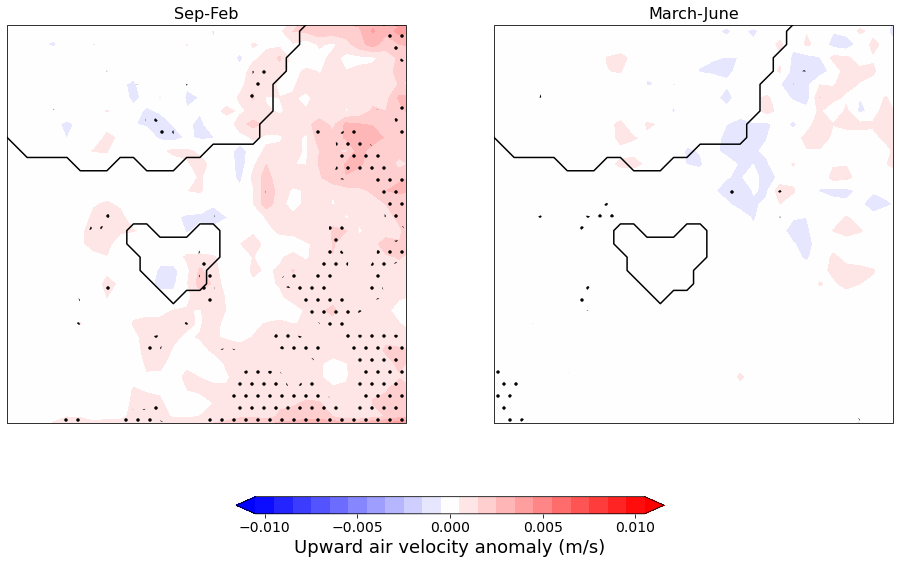

In [27]:
## phase panels

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9),
                          subplot_kw={'projection': ccrs.PlateCarree()})  
    
    data = wwind_year_phases_xr.sel(pressure=400).mean(dim='time')
    mask_mean = mask.mean(dim='time')

    phases = ['Sep-Feb', 'March-June']
    
    for col in range(ncol):
        cur_data = data[col]
        contour = ax[col].contourf(
            cur_data.longitude,
            cur_data.latitude,
            cur_data.values,
            levels=np.arange(-0.0105, 0.011, 0.001),
            add_colorbar=False,
            cmap=plt.cm.get_cmap('bwr'),
            extend='both'
        )

        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')

        phase_mask_mean = wwind_sig_da_lat[col]
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )
        ax[col].set_extent([140, 155, -48, -33],crs=ccrs.PlateCarree())
        ax[col].set_title(phases[col], fontsize=16)
        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-0.01, 0.015, 0.005),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Upward air velocity anomaly (m/s)", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_vertical_wwind_phases_cb_aus.png')
    

multiple_plots()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


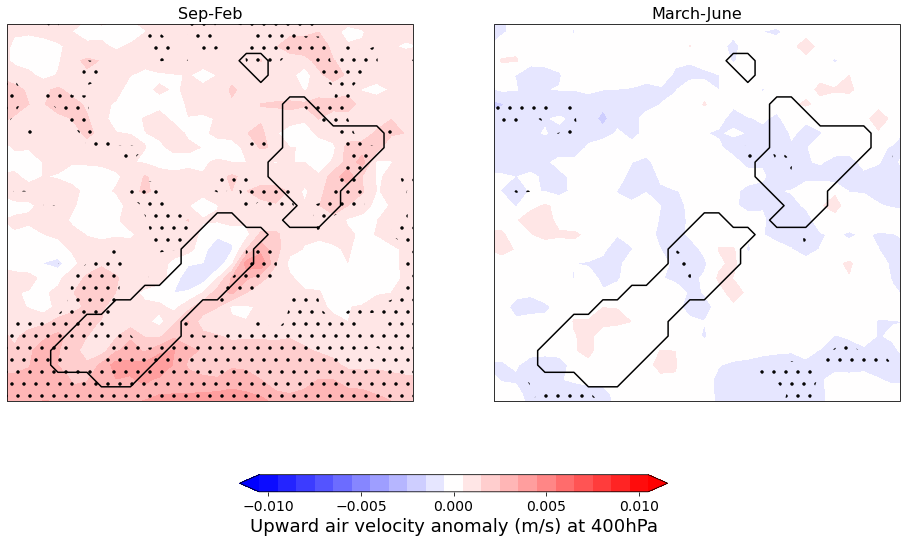

In [25]:
## phase panels

def multiple_plots():
    nrow = 1
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9),
                          subplot_kw={'projection': ccrs.PlateCarree()})  
    
    data = wwind_year_phases_xr.sel(pressure=400).mean(dim='time')
    mask_mean = mask.mean(dim='time')

    phases = ['Sep-Feb', 'March-June']

    for col in range(ncol):
        cur_data = data[col]
        contour = ax[col].contourf(
            cur_data.longitude,
            cur_data.latitude,
            cur_data.values,
            levels=np.arange(-0.0105, 0.011, 0.001),
            add_colorbar=False,
            cmap=plt.cm.get_cmap('bwr'), 
            extend='both'
        )

        ax[col].contour(
            mask_mean.longitude, 
            mask_mean.latitude,
            mask_mean.values,
            levels=[0.5], 
            cmap='gray')
            
        phase_mask_mean = wwind_sig_da_lat[col]
        ax[col].contourf(
            phase_mask_mean.longitude,
            phase_mask_mean.latitude,
            phase_mask_mean.values,
            levels=[0.00, 0.05, 1.00],
            hatches=['.', None],
            colors='none',
            add_colorbar=False,
        )
        ax[col].set_extent([165, 179, -47, -34],crs=ccrs.PlateCarree())
        ax[col].set_title(phases[col], fontsize=16)
        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-0.01, 0.015, 0.005),
                        fraction=0.035,aspect=25, extend='both')
    cbar.set_label("Upward air velocity anomaly (m/s) at 400hPa", fontsize=18)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_vertical_wwind_phases_400hpa_nz.png')
    

multiple_plots()

In [2]:
ds1 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-1986/um_pverc_*.nc').sel(time=slice('1986-06', '1987-06'))
ds2 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-1987/um_pverc_*.nc').sel(time=slice('1987-06', '1988-06')) 
ds3 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-1988/um_pverc_*.nc').sel(time=slice('1988-06', '1989-06'))
ds4 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-1989/um_pverc_*.nc').sel(time=slice('1989-06', '1990-06')) 
ds5 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-1990/um_pverc_*.nc').sel(time=slice('1990-06', '1991-06')) 
ds6 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-1992/um_pverc_*.nc').sel(time=slice('1992-06', '1993-06')) 
ds7 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/alt-result-1993/um_pverc_*.nc').sel(time=slice('1993-06', '1994-06')) 

In [3]:
w1 = ds1['upward_air_velocity']
w2 = ds2['upward_air_velocity']
w3 = ds3['upward_air_velocity']
w4 = ds4['upward_air_velocity']
w5 = ds5['upward_air_velocity']
w6 = ds6['upward_air_velocity']
w7 = ds7['upward_air_velocity']

In [4]:
con1 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-1986/um_pverc_*.nc').sel(time=slice('1986-06', '1987-06'))
con2 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-1987/um_pverc_*.nc').sel(time=slice('1987-06', '1988-06')) 
con3 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-1988/um_pverc_*.nc').sel(time=slice('1988-06', '1989-06'))
con4 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-1989/um_pverc_*.nc').sel(time=slice('1989-06', '1990-06')) 
con5 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-1990/um_pverc_*.nc').sel(time=slice('1990-06', '1991-06')) 
con6 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-1992/um_pverc_*.nc').sel(time=slice('1992-06', '1993-06')) 
con7 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-1993/um_pverc_*.nc').sel(time=slice('1993-06', '1994-06')) 

In [5]:
conw1 = con1['upward_air_velocity']
conw2 = con2['upward_air_velocity']
conw3 = con3['upward_air_velocity']
conw4 = con4['upward_air_velocity']
conw5 = con5['upward_air_velocity']
conw6 = con6['upward_air_velocity']
conw7 = con7['upward_air_velocity']

In [6]:
diff1 = w1.resample(time='1M').mean() - conw1.resample(time='1M').mean()
diff2 = w2.resample(time='1M').mean() - conw2.resample(time='1M').mean()
diff3 = w3.resample(time='1M').mean() - conw3.resample(time='1M').mean()
diff4 = w4.resample(time='1M').mean() - conw4.resample(time='1M').mean()
diff5 = w5.resample(time='1M').mean() - conw5.resample(time='1M').mean()
diff6 = w6.resample(time='1M').mean() - conw6.resample(time='1M').mean()
diff7 = w7.resample(time='1M').mean() - conw7.resample(time='1M').mean()

In [7]:
diff_w = [diff1, diff2, diff3, diff4, diff5, diff6, diff7]

In [ ]:
def get_year_phases_xr(ref_year_xr_map, year_xr_map, phase_dim='event_month'):
    phase_ranges = {
        "buildup": {
            "start": "06",
            "end": "10",
        },
        "peak": {
            "start": "11",
            "end": "02",
        },
        "diedown": {
            "start": "03",
            "end": "06",
        },
    }

    year_phases = []
    years = ref_year_xr_map.keys()
    for year in years:
        year_xr = year_xr_map[year]

        next_year = year + 1
        buildup_slice = slice("{}-{}".format(year, phase_ranges["buildup"]["start"]),
                              "{}-{}".format(year, phase_ranges["buildup"]["end"]))
        peak_slice = slice("{}-{}".format(year, phase_ranges["peak"]["start"]),
                              "{}-{}".format(next_year, phase_ranges["peak"]["end"]))
        diedown_slice = slice("{}-{}".format(next_year, phase_ranges["diedown"]["start"]),
                              "{}-{}".format(next_year, phase_ranges["diedown"]["end"]))

        buildup = year_xr.sel({phase_dim: buildup_slice}).mean(dim=phase_dim)
        peak = year_xr.sel({phase_dim: peak_slice}).mean(dim=phase_dim)
        diedown = year_xr.sel({phase_dim: diedown_slice}).mean(dim=phase_dim)

        year_phase_xr = xr.concat([buildup, peak, diedown], dim="phase")
        year_phases.append(year_phase_xr)

    year_phases_xr = xr.concat(year_phases, dim="time")
    return year_phases_xr

In [8]:
index_means_w = []
for m in range(0, 13):
    index_list = []
    for diff_year in diff_w:
        index_list.append(diff_year.isel(time=m))
    index_means_w.append(xr.concat(index_list, dim="time").mean(dim="time"))
index_w_xr = xr.concat(index_means_w, dim="time")
index_w_xr

<xarray.DataArray 'upward_air_velocity' (time: 13, pressure: 16, latitude: 50,
                                         longitude: 110)>
dask.array<concatenate, shape=(13, 16, 50, 110), dtype=float32, chunksize=(1, 16, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
  * pressure   (pressure) float64 100.0 150.0 200.0 250.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: time

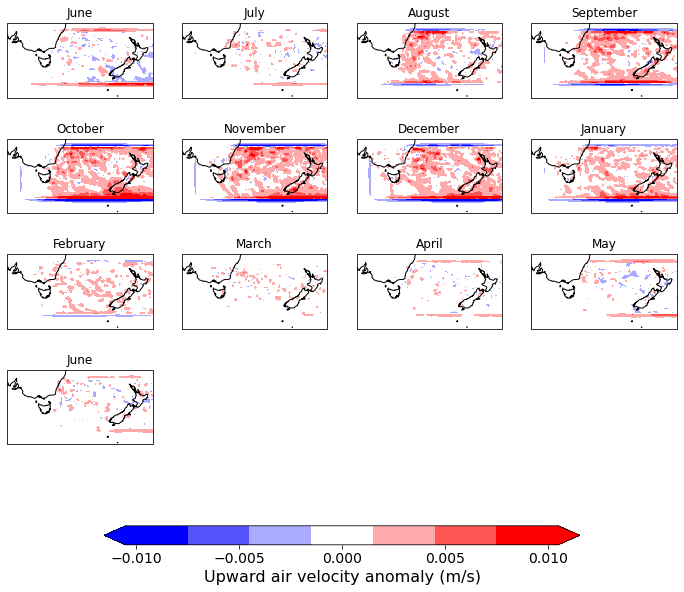

In [24]:
## monthly panels for w wind at mid-troposphere (pressure level = 500hPa)

def multiple_plots():
    nrow = 4
    ncol = 4
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(12,10),
                           subplot_kw={'projection': ccrs.PlateCarree()})
    
    data = index_w_xr.sel(pressure=500)

    months = ['June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 
              'March', 'April', 'May', 'June']

    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data[data_idx]
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(-0.0105, 0.011, 0.001),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 7),
                extend='both'
            )

            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree())
            ax[row, col].set_title(months[data_idx])
            ax[row, col].coastlines()

        
            data_idx += 1
            if data_idx > 12:
                stop_plotting = True
                break
        if stop_plotting:
            break

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')
    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[13:]):
        fig.delaxes(axis) 
        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-0.01, 0.015, 0.005),
                        fraction=0.035,aspect=25)
    cbar.set_label("Upward air velocity anomaly (m/s)", fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_vertical_wwind_months_500hpa.png')
    

multiple_plots()

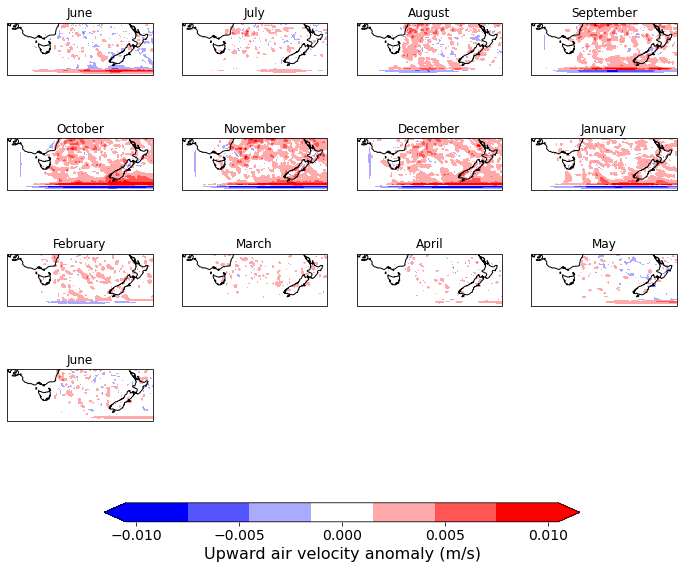

In [23]:
## monthly panels for w wind at mid-troposphere (pressure level = 600hPa)

def multiple_plots():
    nrow = 4
    ncol = 4
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(12,10),
                           subplot_kw={'projection': ccrs.PlateCarree()})
    
    data = index_w_xr.sel(pressure=600)

    months = ['June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 
              'March', 'April', 'May', 'June']

    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data[data_idx]
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(-0.0105, 0.011, 0.001),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 7),
                extend='both'
            )

            ax[row, col].set_extent([135, 180, -50, -34],crs=ccrs.PlateCarree())
            ax[row, col].set_title(months[data_idx])
            ax[row, col].coastlines()

        
            data_idx += 1
            if data_idx > 12:
                stop_plotting = True
                break
        if stop_plotting:
            break

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')
    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[13:]):
        fig.delaxes(axis) 
        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-0.01, 0.015, 0.005),
                        fraction=0.035,aspect=25)
    cbar.set_label("Upward air velocity anomaly (m/s)", fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_vertical_wwind_months_600hpa.png')
    

multiple_plots()

/local/e14/cp3790/tmp/ipykernel_3763833/3897595327.py:19: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  contour = ax[row, col].contourf(


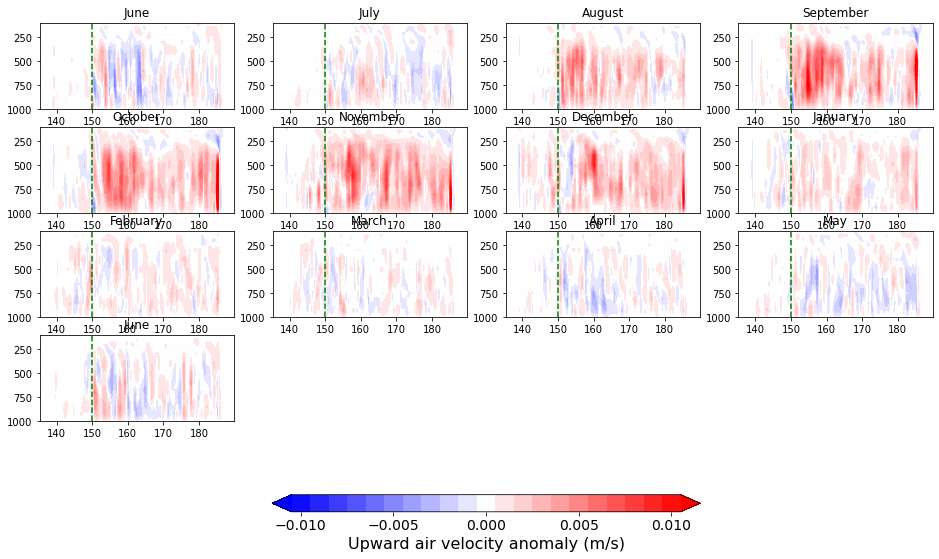

In [106]:
## monthly panels

def multiple_plots():
    nrow = 4
    ncol = 4
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9))  
    
    data = index_w_xr.sel(latitude=-35, method='nearest')

    months = ['June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 
              'March', 'April', 'May', 'June']

    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data[data_idx]
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.pressure,
                cur_data.values,
                levels=np.arange(-0.0105, 0.011, 0.001),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr'),
                extend='both',
            )

            ax[row, col].set_title(months[data_idx])
            ax[row, col].invert_yaxis()
            ax[row, col].axvline(x=150, linestyle='--', color='green')
        
            data_idx += 1
            if data_idx > 12:
                stop_plotting = True
                break
        if stop_plotting:
            break

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')
    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[13:]):
        fig.delaxes(axis) 
        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-0.01, 0.015, 0.005),
                        fraction=0.035,aspect=25)
    cbar.set_label("Upward air velocity anomaly (m/s)", fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_vertical_wwind_months_new.png')
    

multiple_plots()